In [327]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://i.imgur.com/rLmjLpl.jpg", width=900, height=100) 

# PREÇOS DE GÁS NO BRASIL - ANÁLISE EXPLORATÓRIA

#### Esse dataset possui dados de preços de gás no Brasil entre 2004 e 2019.
#### A Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) divulga semanalmente os preços do gás, diesel e outros combustíveis utilizados no transporte em todo o país. Esses conjuntos de dados trazem o valor médio por litro, número de postos analisados e outras informações agrupadas por regiões e estados de todo o país.
#### Iremos realizar a análise exploratória mostrando informações de maior relevância.

Segue abaixo uma breve explicação de cada coluna existente:

DATA INICIAL - Data de início de análise dos postos
DATA FINAL - Data final de análise dos postos

REGIÃO - Região em que os postos foram analisados

ESTADO - Estado em que os postos foram analisados

PRODUTO - GNV, ETANOL HIDRATADO, GASOLINA....

NÚMERO DE POSTOS PESQUISADOS - Somatória de postos de gasolina analisados

UNIDADE DE MEDIDA - R$ / l, R$ / M...

PREÇO MÉDIO REVENDA - Preço médio na qual o produto foi revendido

DESVIO PADRÃO REVENDA - Preço padrão na qual o produto foi revendido

PREÇO MÍNIMO REVENDA - Preço mínimo na qual o produto foi revendido

PREÇO MÁXIMO REVENDA - Preço máximo na qual o produto foi revendido

MARGEM MÉDIA REVENDA - Margem média de preço na qual o produto foi revendido

COEF DE VARIAÇÃO REVENDA - Fornece a variação de dados obtidos em relação à média

PREÇO MÉDIO DISTRIBUIÇÃO - Preço média na qual um produto foi distribuído

DESVIO PADRÃO DISTRIBUIÇÃO - Dispersão padrão dos dados de distribuição dos produtos 

PREÇO MÍNIMO DISTRIBUIÇÃO - Peço mínimo de distribuição dos produtos

PREÇO MÁXIMO DISTRIBUIÇÃO - Peço máximo de distribuição dos produtos

COEF DE VARIAÇÃO DISTRIBUIÇÃO - Fornece a variação de dados obtidos em relação à distribuição

MÊS - Janeiro, Fevereiro...

ANO - 2009,2010....


In [328]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotagem de dados
import matplotlib.pyplot
import numpy as np # algebra linear
import os # acessar estrutura de diretórios
import pandas as pd # processamento de dados
import seaborn as sns
import csv
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### 1 - Importando e visualizando os dados.
### 2 - Algumas colunas possuem dados com o caractere "-" e por isso não podem ser 
###     convertidas para números, portanto, não estão exatamente nulas. 
### 3 - Vamos substituir esses dados pelo valor NaN e depois substituir pela mediana dos dados dessa coluna.

In [329]:
#df = pd.read_table("2004-2019.tsv")
valores_incorretos = ['-','NaN','na','--','.','n/a']
df = pd.read_csv("2004-2019.tsv", delimiter='\t',na_values=valores_incorretos)
df.drop('Unnamed: 0',inplace=True,axis=1) #deleta a coluna Unnamed: 0
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


In [330]:
df.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,103392.000000,106823.000000,103423.000000,103423.000000,103423.000000,103423.000000,103423.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,2.225151,0.045418,8.557966,0.559404,7.413641,9.803920,0.046636,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,4.375085,0.025066,13.603255,1.257212,11.680812,15.933194,0.042134,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.282000,0.029000,1.795000,0.047000,1.674400,1.945600,0.021000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.383000,0.041000,2.335000,0.077000,2.219700,2.507000,0.030000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.560000,0.058000,3.306000,0.151000,3.142600,3.520000,0.061000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.395000,83.137000,18.385000,83.000000,94.500000,0.780000,12.000000,2019.000000


### Tipos de dados das colunas

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           103392 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

In [332]:
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
       'ANO'],
      dtype='object')

### Alterando os nomes de algumas colunas

In [333]:
df = df.rename(columns={'DATA INICIAL': 'DATA_INICIAL',
                        'DATA FINAL': 'DATA_FINAL',
                        'REGIÃO': 'REGIAO',
                        'NÚMERO DE POSTOS PESQUISADOS': 'NUMERO_POSTOS_PESQUISADOS',
                        'UNIDADE DE MEDIDA': 'UNIDADE_DE_MEDIDA',
                        'PREÇO MÉDIO REVENDA': 'PRECO_MEDIO_REVENDA',
                        'DESVIO PADRÃO REVENDA': 'DESVIO_PADR_REVENDA',
                        'PREÇO MÍNIMO REVENDA': 'PRECO_MIN_REVENDA',
                        'PREÇO MÁXIMO REVENDA': 'PRECO_MAX_REVENDA',
                        'MARGEM MÉDIA REVENDA': 'MARGEM_MED_REVENDA',
                        'COEF DE VARIAÇÃO REVENDA': 'COEF_VARIACAO_REVENDA',
                        'PREÇO MÉDIO DISTRIBUIÇÃO': 'PRECO_MED_DISTRIBUICAO',
                        'DESVIO PADRÃO DISTRIBUIÇÃO': 'DESVIO_PADR_DISTRIB',
                        'PREÇO MÍNIMO DISTRIBUIÇÃO': 'PRECO_MIN_DISTRIB',
                        'PREÇO MÁXIMO DISTRIBUIÇÃO': 'PRECO_MAX_DISTRIB',
                        'COEF DE VARIAÇÃO DISTRIBUIÇÃO': 'COEF_VARIACAO_DISTRIB',
                        'MÊS': 'MES'})
# Ou podemos usar o comando df.columns.str.replace(' ', '_')

In [334]:
df.head()

,DATA_INICIAL,DATA_FINAL,REGIAO,ESTADO,PRODUTO,NUMERO_POSTOS_PESQUISADOS,UNIDADE_DE_MEDIDA,PRECO_MEDIO_REVENDA,DESVIO_PADR_REVENDA,PRECO_MIN_REVENDA,PRECO_MAX_REVENDA,MARGEM_MED_REVENDA,COEF_VARIACAO_REVENDA,PRECO_MED_DISTRIBUICAO,DESVIO_PADR_DISTRIB,PRECO_MIN_DISTRIB,PRECO_MAX_DISTRIB,COEF_VARIACAO_DISTRIB,MES,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


### Somatória dos valores nulos por coluna

In [335]:
df.isnull().sum()

DATA_INICIAL                    0
DATA_FINAL                      0
REGIAO                          0
ESTADO                          0
PRODUTO                         0
NUMERO_POSTOS_PESQUISADOS       0
UNIDADE_DE_MEDIDA               0
PRECO_MEDIO_REVENDA             0
DESVIO_PADR_REVENDA             0
PRECO_MIN_REVENDA               0
PRECO_MAX_REVENDA               0
MARGEM_MED_REVENDA           3431
COEF_VARIACAO_REVENDA           0
PRECO_MED_DISTRIBUICAO       3400
DESVIO_PADR_DISTRIB          3400
PRECO_MIN_DISTRIB            3400
PRECO_MAX_DISTRIB            3400
COEF_VARIACAO_DISTRIB        3400
MES                             0
ANO                             0
dtype: int64

### Exemplo: Na linha 106813 podemos ver que existem valores NaN

In [336]:
df.iloc[[106813]]

,DATA_INICIAL,DATA_FINAL,REGIAO,ESTADO,PRODUTO,NUMERO_POSTOS_PESQUISADOS,UNIDADE_DE_MEDIDA,PRECO_MEDIO_REVENDA,DESVIO_PADR_REVENDA,PRECO_MIN_REVENDA,PRECO_MAX_REVENDA,MARGEM_MED_REVENDA,COEF_VARIACAO_REVENDA,PRECO_MED_DISTRIBUICAO,DESVIO_PADR_DISTRIB,PRECO_MIN_DISTRIB,PRECO_MAX_DISTRIB,COEF_VARIACAO_DISTRIB,MES,ANO
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.1,3.495,3.699,NaN,0.028,NaN,NaN,NaN,NaN,NaN,6,2019


### Tratando os tipos "Object"

In [337]:
# Colocando as colunas em um vetor
colunas = ['DATA_INICIAL', 'DATA_FINAL', 'REGIAO', 'ESTADO','PRODUTO', 'NUMERO_POSTOS_PESQUISADOS', 
'UNIDADE_DE_MEDIDA','PRECO_MEDIO_REVENDA', 'DESVIO_PADR_REVENDA', 'PRECO_MIN_REVENDA',
'PRECO_MAX_REVENDA', 'MARGEM_MED_REVENDA', 'COEF_VARIACAO_REVENDA','PRECO_MED_DISTRIBUICAO', 
'DESVIO_PADR_DISTRIB', 'PRECO_MIN_DISTRIB','PRECO_MAX_DISTRIB', 'COEF_VARIACAO_DISTRIB', 
'MES', 'ANO']

# Mudando o tipo de dados das colunas por meio do laço For
for index, coluna in enumerate(colunas):
    if index < 2:
        df[f'{coluna}'] = df[f'{coluna}'].values.astype('datetime64')
    elif index > 1 and index < 5 or index == 6:
        df[f'{coluna}'] = df[f'{coluna}'].astype("string")
    elif index > 6 and index < 18:
        df[f'{coluna}'] = df[f'{coluna}'].astype(float)
    else:
        df[f'{coluna}'].astype(int)

In [338]:
# Pronto. Os tipos "Object" de cada coluna foram substituídos pelos tipos corretos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATA_INICIAL               106823 non-null  datetime64[ns]
 1   DATA_FINAL                 106823 non-null  datetime64[ns]
 2   REGIAO                     106823 non-null  string        
 3   ESTADO                     106823 non-null  string        
 4   PRODUTO                    106823 non-null  string        
 5   NUMERO_POSTOS_PESQUISADOS  106823 non-null  int64         
 6   UNIDADE_DE_MEDIDA          106823 non-null  string        
 7   PRECO_MEDIO_REVENDA        106823 non-null  float64       
 8   DESVIO_PADR_REVENDA        106823 non-null  float64       
 9   PRECO_MIN_REVENDA          106823 non-null  float64       
 10  PRECO_MAX_REVENDA          106823 non-null  float64       
 11  MARGEM_MED_REVENDA         103392 non-null  float64 

### Substituindo os valores NaN

In [339]:
# Precisamos substituir os valores NaN pelas médias dos valores de cada coluna separadamente.
# Vamos começar coletando as médias dos valores que não estão nulos

nan_colunas=[
    'MARGEM_MED_REVENDA',
    'PRECO_MED_DISTRIBUICAO',
    'DESVIO_PADR_DISTRIB',
    'PRECO_MIN_DISTRIB',
    'PRECO_MAX_DISTRIB',
    'COEF_VARIACAO_DISTRIB'
]

df_medianas=[]
for x in nan_colunas:
    df_medianas.append(df[f'{x}'].median())
df_medianas

[0.383, 2.335, 0.077, 2.2197, 2.507, 0.03]

In [340]:
# Agora que temos a média de cada coluna, basta substituir os valores das médias em cada campo com valores NaN
for index,command in enumerate(nan_colunas):
    df[f'{command}'].fillna(df_medianas[index],inplace=True)

df.isnull().sum()

DATA_INICIAL                 0
DATA_FINAL                   0
REGIAO                       0
ESTADO                       0
PRODUTO                      0
NUMERO_POSTOS_PESQUISADOS    0
UNIDADE_DE_MEDIDA            0
PRECO_MEDIO_REVENDA          0
DESVIO_PADR_REVENDA          0
PRECO_MIN_REVENDA            0
PRECO_MAX_REVENDA            0
MARGEM_MED_REVENDA           0
COEF_VARIACAO_REVENDA        0
PRECO_MED_DISTRIBUICAO       0
DESVIO_PADR_DISTRIB          0
PRECO_MIN_DISTRIB            0
PRECO_MAX_DISTRIB            0
COEF_VARIACAO_DISTRIB        0
MES                          0
ANO                          0
dtype: int64

### Visualizando os dados

In [341]:
# Vamos criar as variáveis com os dados que iremos precisar

df_geral = df.filter(['ANO','ESTADO','MARGEM_MED_REVENDA','PRECO_MED_DISTRIBUICAO','DESVIO_PADR_DISTRIB',
                      'PRECO_MIN_DISTRIB','PRECO_MAX_DISTRIB','COEF_VARIACAO_DISTRIB']).copy()
dt1=df[['ANO','ESTADO','PRECO_MIN_DISTRIB','PRECO_MAX_DISTRIB']].groupby(['ESTADO','ANO']).mean()


### Quais são os tipos de combustíveis?

In [342]:
df2 = df[['PRODUTO']].groupby(['PRODUTO']).sum()
df2

""
PRODUTO
ETANOL HIDRATADO
GASOLINA COMUM
GLP
GNV
ÓLEO DIESEL
ÓLEO DIESEL S10


### Qual é o número de postos pesquisados por produto?

In [351]:
dt1=df[['PRODUTO','NUMERO_POSTOS_PESQUISADOS']].groupby(['PRODUTO']).sum()
g = dt1.sort_values(by='NUMERO_POSTOS_PESQUISADOS', ascending=True)
g

,NUMERO_POSTOS_PESQUISADOS
PRODUTO,
GNV,377385
ÓLEO DIESEL S10,1274777
ÓLEO DIESEL,5022817
GLP,5532433
ETANOL HIDRATADO,6151637
GASOLINA COMUM,6613068


### Qual o total de postos pesquisados de 2005 até 2019 em todo o Brasil?

<AxesSubplot:xlabel='ANO'>

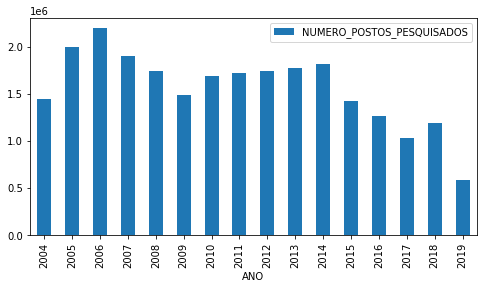

In [127]:
dt1=df[['ANO','ESTADO','NUMERO_POSTOS_PESQUISADOS']].groupby(['ESTADO','ANO']).sum()
#dt1.pivot_table(index=['ESTADO'], columns=['ANO'], values=['NUMERO_POSTOS_PESQUISADOS'])
dt1_teste = dt1.query('ANO > 2014')
grafico_pos_pesquisados=df[['ANO','NUMERO_POSTOS_PESQUISADOS']].groupby(['ANO']).sum()
grafico_pos_pesquisados.plot(kind='bar',figsize=(8,4))

### TOP 10 - Média de Postos Pesquisados por Estado ao longo de 9 anos

<AxesSubplot:xlabel='NUMERO_POSTOS_PESQUISADOS', ylabel='ESTADO'>

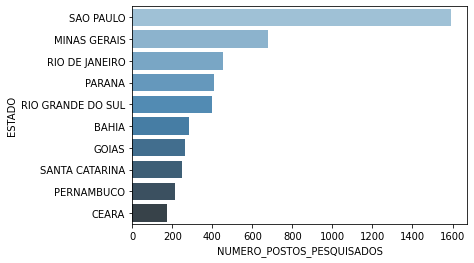

In [128]:
df_menor = df.copy()
result = df.groupby(["ESTADO"])['NUMERO_POSTOS_PESQUISADOS'].aggregate(np.mean).reset_index().sort_values('NUMERO_POSTOS_PESQUISADOS',ascending=False)
sns.barplot(y='ESTADO', x="NUMERO_POSTOS_PESQUISADOS", data=result, order=result['ESTADO'][:10],palette="Blues_d") 

### Qual o número de postos pesquisados por Estado em 2019?

<AxesSubplot:ylabel='ESTADO,ANO'>

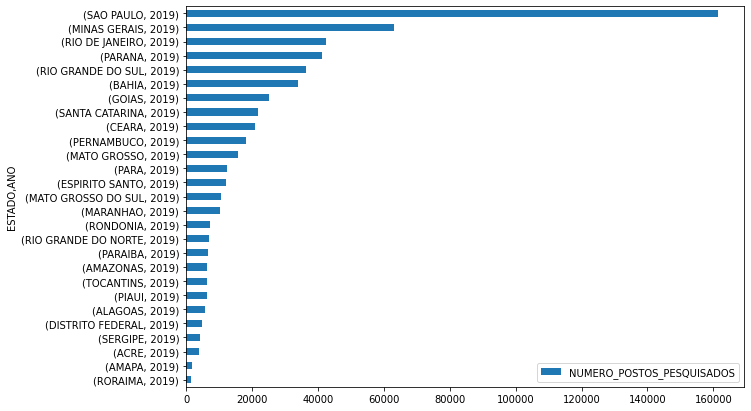

In [352]:
dt1=df[['ANO','ESTADO','NUMERO_POSTOS_PESQUISADOS']].groupby(['ESTADO','ANO']).sum()
dt1_teste = dt1.query('ANO == [2019]').sort_values(by='NUMERO_POSTOS_PESQUISADOS', ascending=True)
dt1_teste.sort_values(by='NUMERO_POSTOS_PESQUISADOS').plot(kind='barh',figsize=(10,7))

### Qual é a MÉDIA de preços mínimos e máximos de distribuição por Estado em 2019?

<AxesSubplot:ylabel='ESTADO,ANO'>

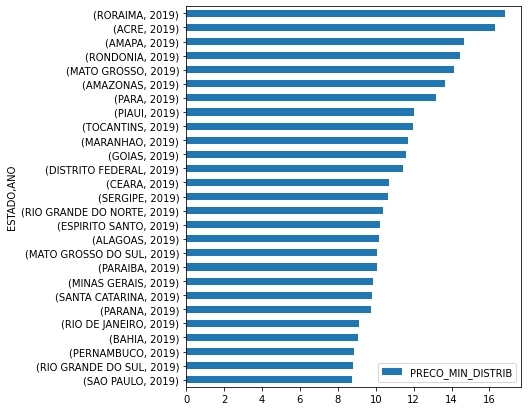

In [320]:
dt1=df[['ANO','ESTADO','PRECO_MIN_DISTRIB']].groupby(['ESTADO','ANO']).mean()
dt2=df[['ANO','ESTADO','PRECO_MAX_DISTRIB']].groupby(['ESTADO','ANO']).mean()

# MÉDIA DE PREÇO MÍNIMO DE DISTRIUBIÇÃO
teste1 = dt1.query('ANO == [2019]').sort_values(by='PRECO_MIN_DISTRIB', ascending=True)
teste1.plot(kind='barh',figsize=(6,7)) 

### Média de preço máximo de distribuição

<AxesSubplot:ylabel='ESTADO,ANO'>

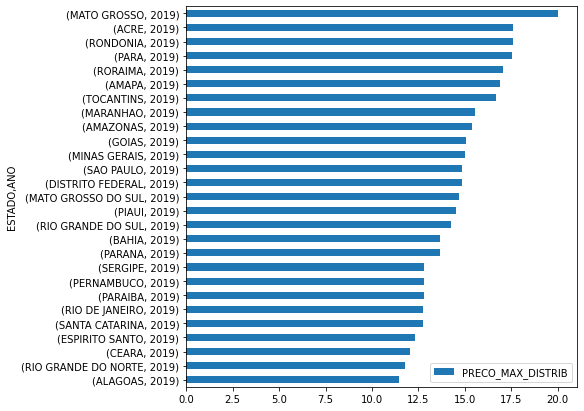

In [354]:
teste2 = dt2.query('ANO == [2019]').sort_values(by='PRECO_MAX_DISTRIB', ascending=True)
teste2.plot(kind='barh',figsize=(7,7)) 

## Conforme observado, efetuamos a limpeza, padronização e visualização dos dados.